In [1]:
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.mpl.rc("figure", figsize=(10,6))

In [3]:
#opening the vector map
shp_path = "./gadm41_PHL_1.shp"
#reading the shape file by using reader function of the shape lib
sf = shp.Reader(shp_path)

In [4]:
len(sf.shapes())

81

In [5]:
sf.records()

[Record #0: ['PHL.1_1', 'PHL', 'Philippines', 'Abra', 'NA', 'NA', 'Lalawigan', 'Province', '1401', 'PH.AB', 'PH-ABR'],
 Record #1: ['PHL.2_1', 'PHL', 'Philippines', 'Agusan del Norte', 'NA', 'NA', 'Lalawigan', 'Province', '1602', 'PH.AN', 'PH-AGN'],
 Record #2: ['PHL.3_1', 'PHL', 'Philippines', 'Agusan del Sur', 'NA', 'NA', 'Lalawigan', 'Province', '1603', 'PH.AS', 'PH-AGS'],
 Record #3: ['PHL.4_1', 'PHL', 'Philippines', 'Aklan', 'NA', 'NA', 'Lalawigan', 'Province', '604', 'PH.AK', 'PH-AKL'],
 Record #4: ['PHL.5_1', 'PHL', 'Philippines', 'Albay', 'NA', 'NA', 'Lalawigan', 'Province', '505', 'PH.AL', 'PH-ALB'],
 Record #5: ['PHL.6_1', 'PHL', 'Philippines', 'Antique', 'NA', 'NA', 'Lalawigan', 'Province', '606', 'PH.AQ', 'PH-ANT'],
 Record #6: ['PHL.7_1', 'PHL', 'Philippines', 'Apayao', 'NA', 'NA', 'Lalawigan', 'Province', '1481', 'PH.AP', 'PH-APA'],
 Record #7: ['PHL.8_1', 'PHL', 'Philippines', 'Aurora', 'NA', 'NA', 'Lalawigan', 'Province', '377', 'PH.AU', 'PH-AUR'],
 Record #8: ['PHL.9_1

In [6]:
def read_shapefile(sf):
    #fetching the headings from the shape file
    fields = [x[0] for x in sf.fields][1:]
#fetching the records from the shape file
    records = [list(i) for i in sf.records()]
    shps = [s.points for s in sf.shapes()]
#converting shapefile data into pandas dataframe
    df = pd.DataFrame(columns=fields, data=records)
#assigning the coordinates
    df = df.assign(coords=shps)
    return df

In [7]:
df = read_shapefile(sf)
df.shape

(81, 12)

In [8]:
df.sample(5)

,GID_1,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,coords
10,PHL.11_1,PHL,Philippines,Batanes,NA,NA,Lalawigan,Province,209,PH.BN,PH-BTN,"[(121.93083190900029, 20.407499313000073), (12..."
46,PHL.47_1,PHL,Philippines,Metropolitan Manila,NA,NA,Lalawigan,Province,1339,PH.MM,NA,"[(120.99389648400017, 14.411710740000046), (12..."
63,PHL.64_1,PHL,Philippines,Rizal,NA,NA,Lalawigan,Province,458,PH.RI,PH-RIZ,"[(121.24054718000014, 14.297750473000065), (12..."
7,PHL.8_1,PHL,Philippines,Aurora,NA,NA,Lalawigan,Province,377,PH.AU,PH-AUR,"[(121.40289306700015, 15.246270180000181), (12..."
40,PHL.41_1,PHL,Philippines,Lanao del Norte,NA,NA,Lalawigan,Province,1035,PH.LN,PH-LAN,"[(123.81083679200015, 7.701389789000018), (123..."


In [9]:
def plot_shape(id, s=None):
    plt.figure()
    #plotting the graphical axes where map ploting will be done
    ax = plt.axes()
    ax.set_aspect('equal')
#storing the id number to be worked upon
    shape_ex = sf.shape(id)
#NP.ZERO initializes an array of rows and column with 0 in place of each elements 
    #an array will be generated where number of rows will be(len(shape_ex,point))and number of columns will be 1 and stored into the variable
    x_lon = np.zeros((len(shape_ex.points),1))
#an array will be generated where number of rows will be(len(shape_ex,point))and number of columns will be 1 and stored into the variable
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
#plotting using the derived coordinated stored in array created by numpy
    plt.plot(x_lon,y_lat) 
    x0 = np.mean(x_lon)
    y0 = np.mean(y_lat)
    plt.text(x0, y0, s, fontsize=10)
# use bbox (bounding box) to set plot limits
    plt.xlim(shape_ex.bbox[0],shape_ex.bbox[2])
    return x0, y0

TypeError: list indices must be integers or slices, not Index

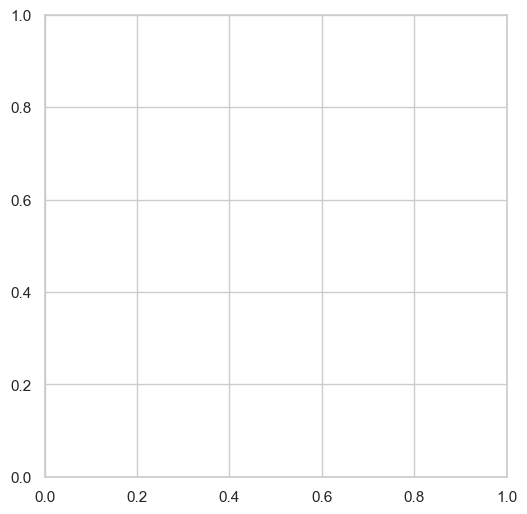

In [12]:
DIST_NAME = "Malabon"
#to get the id of the city map to be plotted
com_id = df[df["NAME_1"] == "Malabon"].index
plot_shape(com_id, "NAME_1")
sf.shape(com_id)